In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
# %load ../main_module.py
# Standard Scientific Import
from IPython.display import display, HTML, Javascript, JSON
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
from matplotlib import pyplot as plt
import sklearn
import seaborn as sns
sns.set()


# 基本序列 Series DataFrame

In [161]:
s_data = pd.Series([1, 3, 5, 7, np.NaN, 9, 11])

dates = pd.date_range("20180106", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))   #randn: 随机生成，满足标准正太分布

df.shape

df.values

array([[ 1.16752891, -0.55688369, -0.44468224, -0.04712133],
       [-0.06585736, -0.72527847, -0.72932521, -0.66093717],
       [ 2.28454637,  1.54249747, -0.2685187 ,  0.32582596],
       [-1.99039363,  0.65754454,  0.41557924, -1.00899291],
       [ 1.1205548 ,  0.40760106, -0.87923242, -1.16232711],
       [-0.76925969,  0.54167676,  1.43368534,  1.10954496]])

In [48]:
d_data = {'A':1, 'B': pd.Timestamp("20180106"), 'C': range(4), 'D': np.arange(4)}

df_data = pd.DataFrame(d_data)

df_data.dtypes

df_data.B

type(df_data.D)

# 基本操作1

In [19]:
df

df.head()  #默认前五行

df.head(1)

df.tail()  #末尾五行

df.tail(1)

df.index #行索引

df.columns #列

df.values  #值

df.describe()  #描述基本信息，最大最小值，计数，平均数，标准差

,A,B,C,D
2018-01-06,0.676139,-0.464892,-0.364328,-0.557016
2018-01-07,-0.040548,-0.138904,0.334349,-1.580959
2018-01-08,-0.808425,1.465267,0.663043,-1.690958
2018-01-09,1.334727,0.298747,-3.277181,-1.009095
2018-01-10,-0.069973,-1.288739,-0.707913,-0.744416
2018-01-11,-0.487479,2.016823,-1.477496,0.139896


# 基本操作2

In [36]:
df.T  #转置

df.shape

df.T.shape

df.sort_index(axis=1)  #针对列索引排序

df.sort_index(axis=1, ascending=False)

df.sort_index(ascending=False)  #针对行索引排序

df.sort_values(by='B')  # A 列值升序排列

,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-08 00:00:00,2018-01-09 00:00:00,2018-01-10 00:00:00,2018-01-11 00:00:00
A,0.676139,-0.040548,-0.808425,1.334727,-0.069973,-0.487479
B,-0.464892,-0.138904,1.465267,0.298747,-1.288739,2.016823
C,-0.364328,0.334349,0.663043,-3.277181,-0.707913,-1.477496
D,-0.557016,-1.580959,-1.690958,-1.009095,-0.744416,0.139896


# 基本操作3

In [61]:
df.A  #输出A列

df[df.A > 0] #输出A特征大于0的对象

df[df > 0]  #输出大于0的数据，小于0的用NaN补位

df2 = df.copy()

tag = ['a'] * 2 + ['b'] * 2 + ['c'] * 2

df2['TAG'] = tag  #df2中增加TAG特征并赋值

df2[df2.TAG.isin(['a', 'c'])]  #打印TAG特征中a, c的行

2018-01-06    0.152084
2018-01-07   -0.337962
2018-01-08    0.636193
2018-01-09   -1.286702
2018-01-10   -0.324079
2018-01-11   -0.990552
Freq: D, Name: A, dtype: float64

# 基本操作4

In [86]:
df.iat[0, 0] = 100 #修改元素

df.A = range(6)

df.B = 200

df.iloc[:, 3:5] = 2000  #对应列赋值

# 基本操作5


In [100]:
dfl = df.reindex(index = dates[0:4], columns=list(df.columns) + ['E']) #重新定义索引，并添加E行

dfl.loc[dates[1:3], ['E']] = 2  #E特征中2， 3行赋值为2

dfl.dropna()  #去掉存在NaN特征的行

pd.isnull(dfl) #判断元素是否为null

dfl.mean() #对每个特征求平均值

dfl.cumsum() #对每个特征累加

dfl.mean(axis=1)

s = pd.Series([1, 3 ,5, np.nan, 6, 8], index=dates).shift(2)  #生成序列后并向右平移2位

df.sub(s, axis='index')  #df - s

df.apply(lambda x: x.max() - x.min()) #每个特征的最大值减去最小值

# 基本操作6

In [163]:
def _sum(x):
    print(type(x))
    return x.sum()

df.apply(_sum) #apply可以指定一个函数作为参数

s = pd.Series(np.random.randint(10, 20, size=15))

s.value_counts()  #统计特征重复出现的次数

s.mode()  #出现次数最多的对象

df = pd.DataFrame(np.random.randn(10, 4), columns=list('ABCD'))

dfl = pd.concat([df.iloc[:3], df.iloc[3:7], df.iloc[7:]])

df == dfl  #判断两个DataFrame的元素是否相等：  shape相同

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


,A,B,C,D
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
5,True,True,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,True,True


# 基本操作7

In [165]:
df

left = pd.DataFrame({'key':["foo", 'foo'], 'lval': [1, 2]})

right = pd.DataFrame({'key':["foo", 'foo'], 'rval': [4, 5]})

pd.merge(left, right, on='key')

s = pd.Series(np.random.randint(1, 5, size=4), index=list('ABCD'))

df.append(s, ignore_index=True)

,A,B,C,D
0,-0.166393,-1.239050,-0.972441,-0.364241
1,-0.843665,0.633155,1.031761,0.106321
2,-0.819551,0.229887,0.671351,0.388795
3,0.202754,-0.118541,1.696137,0.923823
4,1.074340,0.265302,-1.280092,-0.418598
5,-0.576014,1.143613,1.433983,-1.110944
6,0.436659,-0.287695,-0.610154,0.222038
7,0.628108,-3.066460,0.946563,-0.115625
8,-1.188045,-0.267973,0.729045,0.466333
9,-1.154898,0.260509,1.121143,-0.781103


# 基本操作8

In [179]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                              'foo', 'bar', 'foo', 'bar'],
                       'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                       'C': np.random.randn(8),
                       'D': np.random.randn(8)})

df

df.groupby('A').sum()  #根据A特征

df.groupby(['A', 'B']).sum()

df.groupby(['B', 'A']).sum()

C         D
B     A                      
one   bar  0.475482 -0.581435
      foo  1.502251 -0.322343
three bar  0.029630  3.392346
two   bar -1.022660 -0.638066
      foo  1.431431  0.491448

# 基本操作9

In [180]:
 tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                         'foo', 'foo', 'qux', 'qux'],
                        ['one', 'two', 'one', 'two',
                       'one', 'two', 'one', 'two']])) #zip 函数对 对应数据打包成一个个tuple

index = pd.MultiIndex.from_tuples(tuples, names=['First', 'Second'])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

index  #对比df查看

df

df.stack() #将特征索引变为行索引

df.unstack()

# 基本操作10

    df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                       'B': ['A', 'B', 'C'] * 4,
                       'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                       'D': np.random.randn(12),
                       'E': np.random.randn(12)})

# 根据A， B索引为特征，C的索引为列 处理D的值
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

df[df.A == 'one'].groupby('C').mean() #根据A特征等于one为索引，计算c列组合的平均值

# 时间序列

In [207]:
rng = pd.date_range('20180106', periods=600, freq='S')

In [209]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [211]:
ts.resample('2Min').sum()  #重新采样，以2分钟为单位进行加和采样

2018-01-06 00:00:00    32433
2018-01-06 00:02:00    31047
2018-01-06 00:04:00    27320
2018-01-06 00:06:00    28035
2018-01-06 00:08:00    31501
Freq: 2T, dtype: int64

In [212]:
rng1 = pd.period_range('2011Q1', '2017Q1', freq='Q')

In [214]:
rng1.to_timestamp()

DatetimeIndex(['2011-01-01', '2011-04-01', '2011-07-01', '2011-10-01',
               '2012-01-01', '2012-04-01', '2012-07-01', '2012-10-01',
               '2013-01-01', '2013-04-01', '2013-07-01', '2013-10-01',
               '2014-01-01', '2014-04-01', '2014-07-01', '2014-10-01',
               '2015-01-01', '2015-04-01', '2015-07-01', '2015-10-01',
               '2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01',
               '2017-01-01'],
              dtype='datetime64[ns]', freq='QS-OCT')

In [215]:
pd.Timestamp('20170220') - pd.Timestamp('20170112')

Timedelta('39 days 00:00:00')

In [216]:
pd.Timestamp('20170220') + pd.Timedelta(days=12)

Timestamp('2017-03-04 00:00:00')

# 数据类别

In [218]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})

In [220]:
df['grade'] = df['raw_grade'].astype('category') #添加类别数据， 以raw_grade的值为类别基础

In [221]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [225]:
df['grade'].cat.categories  #打印类别

Index(['a', 'b', 'e'], dtype='object')

In [226]:
df['grade'].cat.categories = ['very good', 'good', 'vary bad']

In [227]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,vary bad


In [228]:
df.sort_values(by='grade', ascending=True)

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,vary bad


In [229]:
df.groupby('grade').size()

grade
very good    3
good         2
vary bad     1
dtype: int64

# 数据可视化

In [239]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range('20180106', periods=1000))

In [240]:
ts = ts.cumsum()

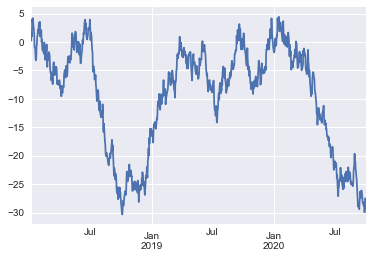

In [241]:
ts.plot()

# 数据读写

In [242]:
df = pd.DataFrame(np.random.randn(10, 4), columns=list("ABCD"))

In [243]:
df

,A,B,C,D
0,0.754513,-1.109291,0.374568,0.281057
1,-0.303175,-1.647014,0.201415,0.121991
2,1.605055,1.103883,-1.536076,1.175981
3,-0.763178,1.565435,0.190301,-0.325655
4,1.991665,-1.118303,2.122355,1.161544
5,-0.385568,0.305770,0.484254,-0.198559
6,-1.221001,1.483265,-1.303011,0.019351
7,-0.897910,-0.910171,-0.328298,-0.131485
8,0.474542,-1.430703,-0.734476,1.069376
9,0.520047,0.538560,0.317688,2.031572


In [245]:
df.to_csv('data.csv')

In [246]:
pd.read_csv('data.csv', index_col=0)

,A,B,C,D
0,0.754513,-1.109291,0.374568,0.281057
1,-0.303175,-1.647014,0.201415,0.121991
2,1.605055,1.103883,-1.536076,1.175981
3,-0.763178,1.565435,0.190301,-0.325655
4,1.991665,-1.118303,2.122355,1.161544
5,-0.385568,0.305770,0.484254,-0.198559
6,-1.221001,1.483265,-1.303011,0.019351
7,-0.897910,-0.910171,-0.328298,-0.131485
8,0.474542,-1.430703,-0.734476,1.069376
9,0.520047,0.538560,0.317688,2.031572
